In [3]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# importing utils
import sys

sys.path.append('..')
from utils.cleaning import CleanData
from utils.advanced_groupby import advanced_groupby

In [5]:
# import dataset
df = pd.read_csv('../data/Week1_challenge_data_source.csv')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [7]:
# cleaning the data and dealing with null values

# drop all null values with column null count less that 10
data = CleanData(df)
data.drop_rows(drop_in_columns=['Start','Start ms','End','End ms','Dur. (ms)','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)','Activity Duration DL (ms)','Activity Duration UL (ms)','Total UL (Bytes)','Dur. (ms).1','Total DL (Bytes)'])

# drop all rows with null that cant be replaced by mean
data.drop_rows(drop_in_columns=['Bearer Id','IMSI','MSISDN/Number','IMEI','Last Location Name','Handset Manufacturer','Handset Type'])

# fill columns with mean with null less or about 1000
data.fill_with_mean(fill_columns=['DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)','250 Kbps < DL TP < 1 Mbps (%)','DL TP > 1 Mbps (%)','UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)','50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)','Nb of sec with Vol DL < 6250B','Nb of sec with Vol UL < 1250B'])

# additional fill with mean
data.fill_with_mean(fill_columns=['Avg RTT DL (ms)','Avg RTT UL (ms)'])

# drop columns with more than 50% null
data.drop_unwanted_column(unwanted_columns=['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','HTTP DL (Bytes)','HTTP UL (Bytes)','Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B','Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 6250B < Vol UL < 37500B'])

Automation in Action...!!!


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.304240e+19,4/29/2019 7:28,615.0,4/30/2019 0:01,407.0,59587.0,2.082010e+14,3.366865e+10,3.533250e+13,T85721A,...,6550499.0,18003146.0,22468983.0,7149728.0,784435351.0,12724751.0,321383162.0,14890486.0,53745392.0,819016468.0
149996,7.277830e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,16191667.0,11763428.0,17883703.0,19678161.0,526609673.0,9197207.0,3264510.0,13487416.0,57628851.0,574175259.0
149997,7.349880e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,13877234.0,8288284.0,19350146.0,21293148.0,626893062.0,4735033.0,712180387.0,2457758.0,39135081.0,666648844.0
149998,1.311450e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,22660510.0,1855903.0,9963942.0,5065760.0,553539484.0,13394316.0,121100856.0,11314729.0,34912224.0,592786405.0


In [8]:
data.df.isnull().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [9]:
clean_data = data.df
clean_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [10]:
clean_data.isnull().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [11]:
# saving clean data dataset
clean_data.to_csv('../data/clean_data.csv')

# Task 1
1. Start by identifying the top 10 handsets used by the customers.
2. Then, identify the top 3 handset manufacturers
3. Next, identify the top 5 handsets per top 3 handset manufacturer
4. Make a short interpretation and recommendation to marketing teams

<AxesSubplot:>

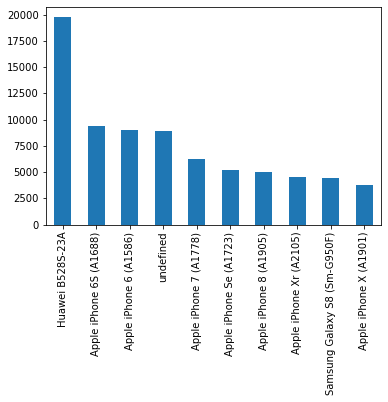

In [12]:
# task 1 1 identifying top 10 handsets used by customers
clean_data['Handset Type'].value_counts()[:10].plot(kind='bar')

<AxesSubplot:>

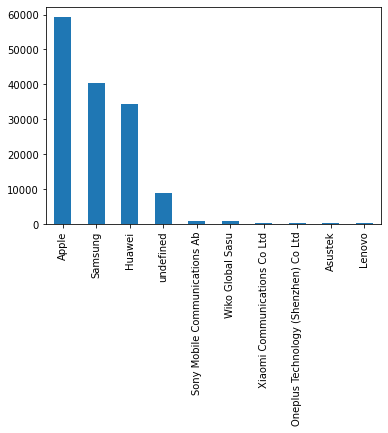

In [13]:
# task 1 2 indentifying top 3 handset manufacturers
clean_data['Handset Manufacturer'].value_counts()[:10].plot(kind='bar')

In [14]:
# get top 3 handset manufacturer
advanced_groupby(clean_data,'Handset Manufacturer','Handset Type')

{'Apple': ['Apple iPad (A1823)',
  'Apple iPad (A1954)',
  'Apple iPad 2 (A1396)',
  'Apple iPad 3 (A1430)',
  'Apple iPad 4 (A1460)'],
 'Samsung': ['Samsung 2018 Galaxy J4',
  'Samsung Galaxy A3 (Sm-A300X)',
  'Samsung Galaxy A3 (Sm-A310X)',
  'Samsung Galaxy A3 (Sm-A320)',
  'Samsung Galaxy A5 (Sm-A500X)'],
 'Huawei': ['Huawei Ale-Ul00',
  'Huawei Ascend G6',
  'Huawei Ascend G620S',
  'Huawei Ascend Mate7',
  'Huawei Ascend P7'],
 'undefined': ['undefined'],
 'Sony Mobile Communications Ab': ['Sony Mobile Comm. Pm-1150-Bv',
  'Sony Mobile Comm. Pm-1151-Bv',
  'Sony Mobile Comm. Pm-1162-Bv',
  'Sony Mobile Comm. Pm-1164-Bv',
  'Sony Mobile Comm. Pm-1181-Bv']}

In [16]:
# task 1 3 top 5 handsets per top 3 handset manufacturer
group = advanced_groupby(clean_data,'Handset Manufacturer','Handset Type',3,5)
group

{'Apple': ['Apple iPad (A1823)',
  'Apple iPad (A1954)',
  'Apple iPad 2 (A1396)',
  'Apple iPad 3 (A1430)',
  'Apple iPad 4 (A1460)'],
 'Samsung': ['Samsung 2018 Galaxy J4',
  'Samsung Galaxy A3 (Sm-A300X)',
  'Samsung Galaxy A3 (Sm-A310X)',
  'Samsung Galaxy A3 (Sm-A320)',
  'Samsung Galaxy A5 (Sm-A500X)'],
 'Huawei': ['Huawei Ale-Ul00',
  'Huawei Ascend G6',
  'Huawei Ascend G620S',
  'Huawei Ascend Mate7',
  'Huawei Ascend P7']}

# Deliverables
1. Interim Submission

In [38]:
sample_data = clean_data[:1000]

In [60]:
def plot_relations(dataset, main):
    # plot Google UL (Bytes) to number if xdr sessions, session duration, total download and upload
    title = str(main)+'vs applications'
    plt.figure(figsize=(15,5))
    
    plt.title(title)
    plt.subplot(1,4,1)
    sns.scatterplot(data=dataset[['Dur. (ms).1',main]], x='Dur. (ms).1', y=main)

    plt.subplot(1,4,2)
    sns.scatterplot(data=dataset[['Dur. (ms)',main]], x='Dur. (ms)', y=main)

    plt.subplot(1,4,3)
    sns.scatterplot(data=dataset[['Total DL (Bytes)',main]], x='Total DL (Bytes)', y=main)

    plt.subplot(1,4,4)
    sns.scatterplot(data=dataset[['Total UL (Bytes)',main]], x='Total UL (Bytes)', y=main)
    
    plt.show()

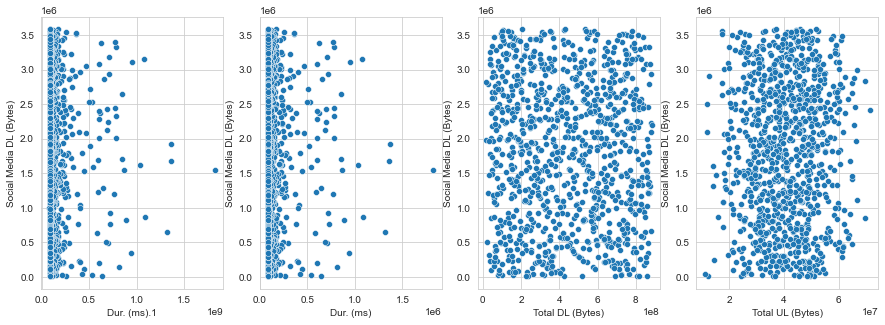

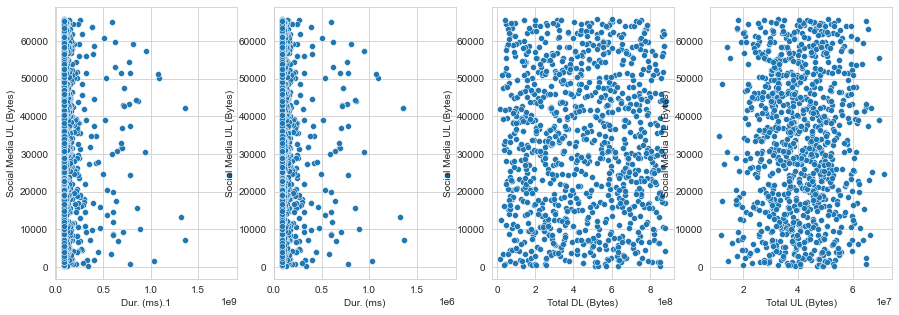

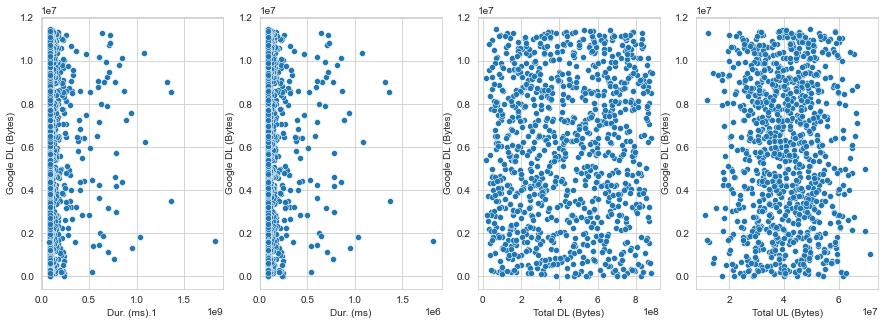

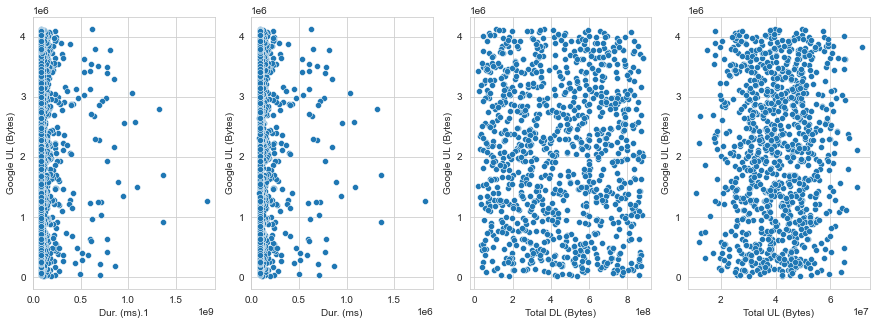

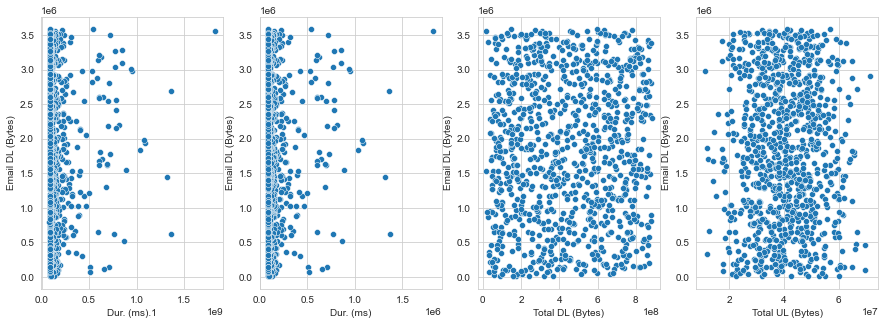

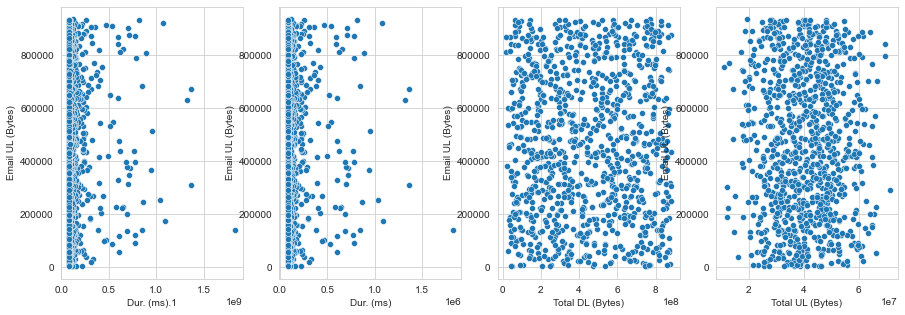

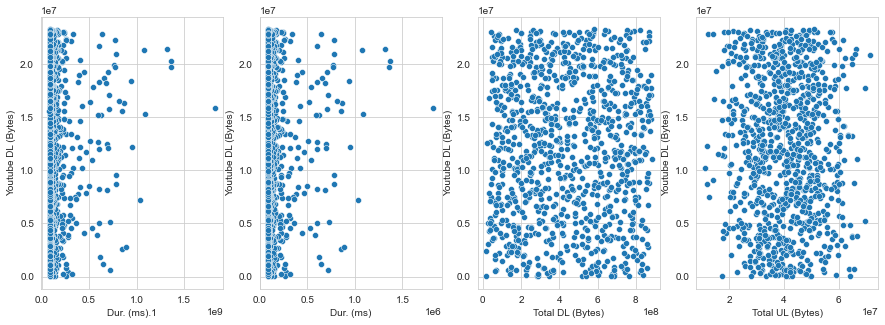

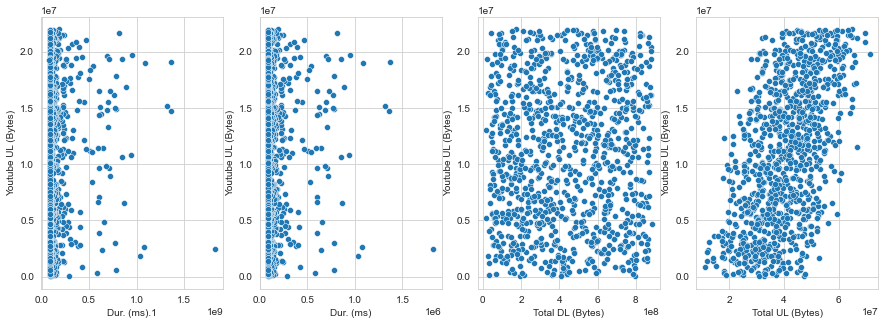

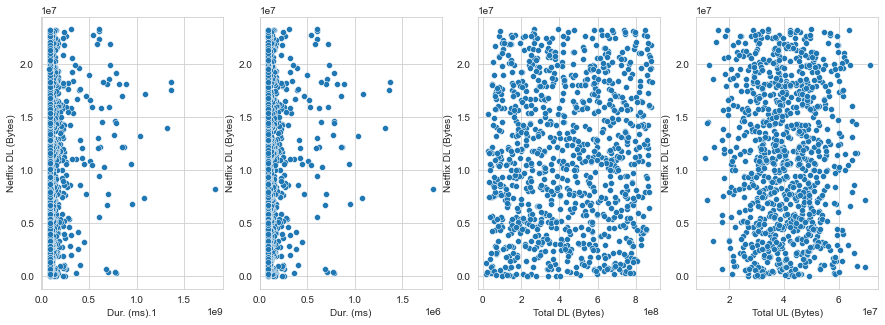

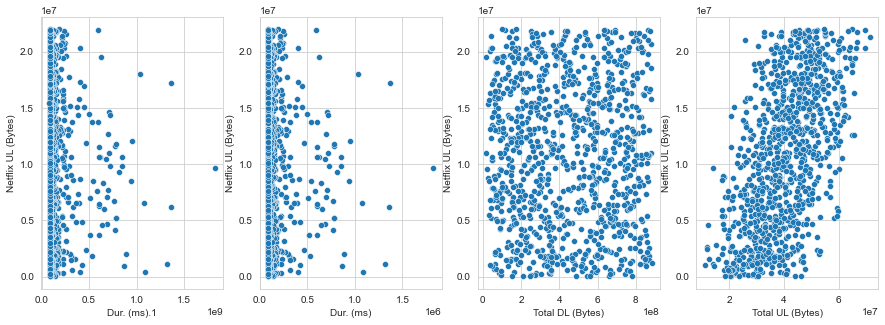

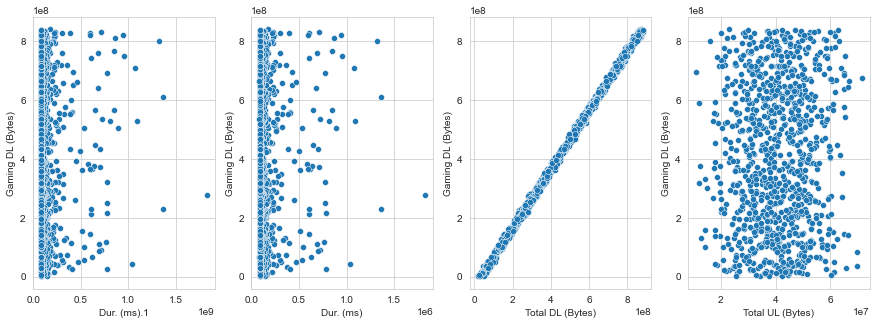

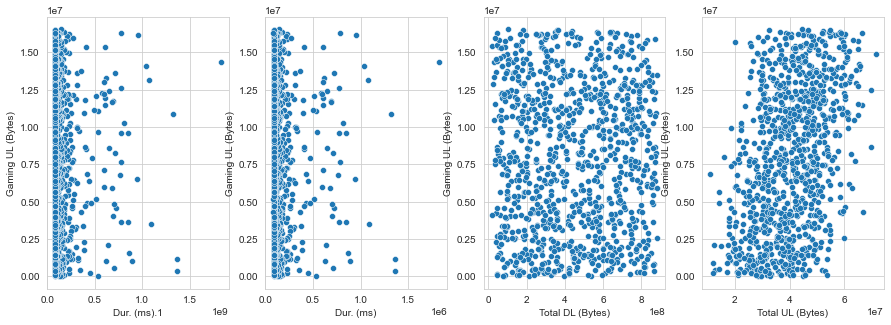

In [61]:
plot_list = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Gaming DL (Bytes)', 'Gaming UL (Bytes)']
for figure in plot_list:
    main = figure
    plot_relations(sample_data[['Dur. (ms).1','Dur. (ms)','Total DL (Bytes)','Total UL (Bytes)',main]], main)